For more information check below:https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df=pd.read_csv('predict.csv')
data=df[['Month','Rainfall']]
data=pd.DataFrame(sales_data)
print(data.head())

     Month  Rainfall
0  2009-01      0.00
1  2009-02      0.00
2  2009-03      1.58
3  2009-04      2.35
4  2009-05      2.70


In [8]:
data.describe()

,Rainfall
count,180.000000
mean,7.183111
std,10.205089
min,0.000000
25%,0.187500
50%,2.700000
75%,11.350000
max,62.850000


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Rainfall.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.783568640773671
p-value: 0.38864937906373365


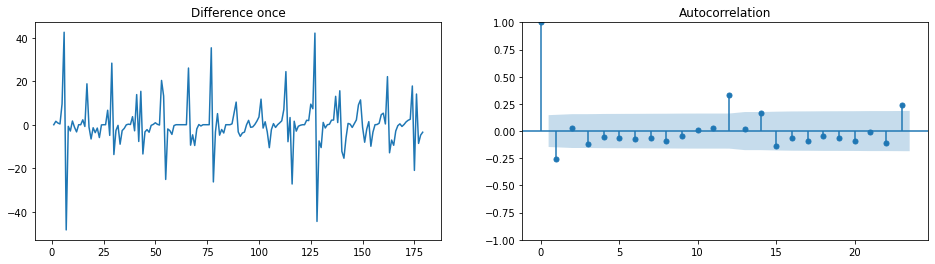

In [22]:
diff = df.Rainfall.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once");
plot_acf(diff, ax=ax2);

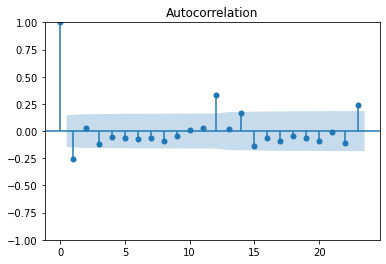

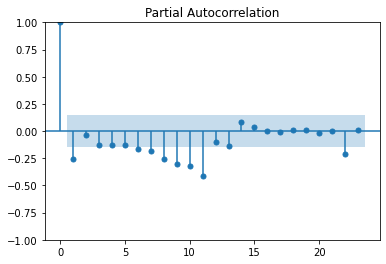

In [24]:
# Plot ACF and PACF
plot_acf(diff)
plot_pacf(diff)
plt.show()

In [26]:
# Define SARIMA parameters
p, d, q = 11, 1, 3
P, D, Q, s = 1, 1, 1, 12 # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).